***
#### **For keep all lib**
`python -m pip freeze > requirements.txt`
#### **For install all lib**
`python -m pip install -r requirements.txt`
#### **For clean all lib use**
`python -m pip uninstall -y -r <(pip freeze)`

***
#### **install torch torchvision torchaudio**
`pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117`
#### **install detectron2**
`git clone https://github.com/facebookresearch/detectron2.git`
***
`python -m pip install -e detectron2`
***

In [237]:
import torch, detectron2

In [238]:
print(torch.cuda.is_available())

True


In [239]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_19:00:59_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0


In [240]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__
# print(torch.cuda.is_available())
print("torch: ", TORCH_VERSION, "; cuda: ", torch.__version__)
print("detectron2:", detectron2.__version__)

torch:  1.13 ; cuda:  1.13.1+cu117
detectron2: 0.6


In [241]:
!nvidia-smi

Mon Jan 16 22:10:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   59C    P8    16W /  84W |   2795MiB /  8192MiB |     37%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [242]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from os import path as p
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

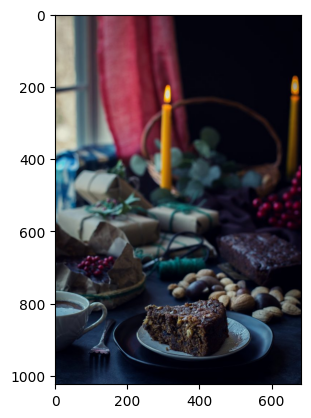

In [243]:
# im = cv2.imread("./img/1.jpeg")
# im = cv2.imread("./img/2.jpeg")
im = cv2.imread("./img/cake/c_3.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# call imshow() using plt object
plt.imshow(im)

In [244]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[01/16 22:10:30 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [245]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([55, 41, 60, 42, 44, 55, 45, 45, 44, 60, 56, 56, 56, 45, 75, 55, 57, 65,
        56, 47], device='cuda:0')
Boxes(tensor([[2.3241e+02, 7.9211e+02, 4.9230e+02, 9.4676e+02],
        [3.0713e+00, 7.6641e+02, 1.4145e+02, 9.3154e+02],
        [1.4988e+00, 7.7292e+02, 6.7771e+02, 1.0156e+03],
        [9.4258e+01, 8.4327e+02, 1.6391e+02, 9.4692e+02],
        [1.0163e+02, 8.4213e+02, 1.6834e+02, 9.4210e+02],
        [1.1526e+01, 5.0538e+02, 2.8379e+02, 6.3931e+02],
        [4.5180e-01, 7.6669e+02, 1.3901e+02, 9.3223e+02],
        [1.2496e+01, 6.9168e+02, 2.5924e+02, 8.1948e+02],
        [2.1843e+01, 8.3260e+02, 1.5404e+02, 9.3106e+02],
        [0.0000e+00, 3.5440e+02, 6.8200e+02, 1.0050e+03],
        [2.2618e+02, 2.2416e+02, 6.2623e+02, 4.6275e+02],
        [2.3560e+00, 3.5975e+02, 1.9869e+02, 6.1313e+02],
        [4.8953e+01, 4.0910e+02, 1.8258e+02, 5.3156e+02],
        [1.5047e+01, 5.7112e+02, 2.5674e+02, 8.1672e+02],
        [2.5440e+02, 5.2353e+02, 4.5645e+02, 6.1055e+02],
        [7

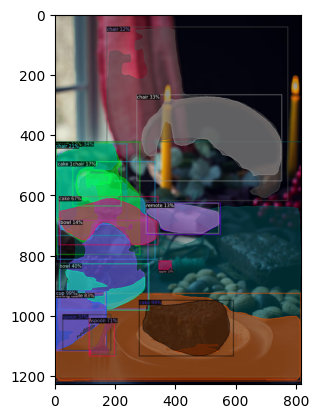

In [246]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
result_image = out.get_image()[:, :, ::-1]

plt.imshow(result_image)

In [247]:
# available classes
classes = outputs["instances"].pred_classes.cpu().numpy()
print(classes)

# available boxes
boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
print(boxes)

[55 41 60 42 44 55 45 45 44 60 56 56 56 45 75 55 57 65 56 47]
[[2.32409592e+02 7.92105713e+02 4.92300079e+02 9.46758545e+02]
 [3.07126880e+00 7.66409119e+02 1.41450150e+02 9.31538086e+02]
 [1.49879539e+00 7.72922668e+02 6.77710205e+02 1.01562476e+03]
 [9.42575836e+01 8.43273438e+02 1.63914597e+02 9.46917114e+02]
 [1.01625046e+02 8.42128052e+02 1.68338104e+02 9.42097412e+02]
 [1.15258036e+01 5.05380554e+02 2.83792969e+02 6.39310913e+02]
 [4.51804459e-01 7.66690979e+02 1.39008102e+02 9.32227905e+02]
 [1.24959755e+01 6.91684814e+02 2.59244202e+02 8.19476074e+02]
 [2.18430882e+01 8.32604370e+02 1.54037857e+02 9.31057983e+02]
 [0.00000000e+00 3.54399109e+02 6.82000000e+02 1.00498334e+03]
 [2.26180313e+02 2.24163666e+02 6.26230713e+02 4.62750061e+02]
 [2.35598469e+00 3.59750366e+02 1.98690231e+02 6.13127441e+02]
 [4.89528389e+01 4.09101013e+02 1.82577408e+02 5.31560120e+02]
 [1.50473223e+01 5.71116882e+02 2.56736755e+02 8.16720337e+02]
 [2.54400909e+02 5.23528687e+02 4.56454742e+02 6.1055011

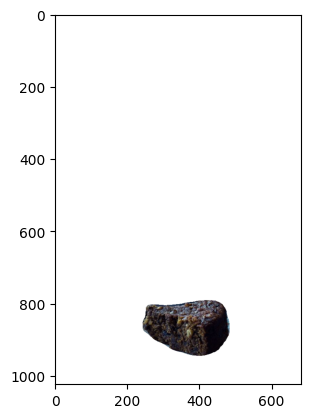

In [248]:
temp_mask_image = []
for i in range(len(classes)):
  class_name = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[classes[i]]
  class_score = outputs["instances"].scores[i].cpu().numpy()
  if class_name in ["cake"]:
    mask = outputs["instances"].pred_masks[i].cpu().numpy()
    tmp_image = im.copy()
    r = len(mask[0])
    j = len(mask)
    for j1 in range(j):
      for r1 in range(r):
        if(mask[j1][r1] == False):
          tmp_image[j1,r1] = 255
    temp_mask_image.append({
        "class_name": class_name,
        "class_score": class_score,
        "mask_image": tmp_image,
    })

best_mask_image = None
for image in temp_mask_image:
  if best_mask_image == None:
    best_mask_image = image
  if image["class_score"] > best_mask_image["class_score"]:
    best_mask_image = image

plt.imshow(best_mask_image["mask_image"])
plt.show()